# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

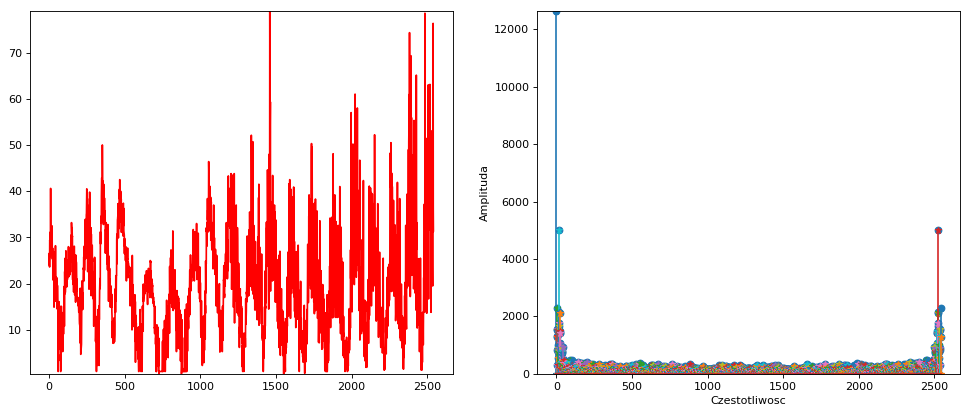

In [6]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt
import random

%matplotlib inline

array=[float(x) for x in open('spots.txt').read().split()]
signal = fft(array)

signal = abs(signal)    
signal = [x/(len(array)/2)  for x in signal]
signal[0]=signal[0]/2


fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
base_t=np.arange(0,len(array))
ax.plot(base_t, array, linestyle='-', color='red')
ax.set_ylim([min(array), max(array)])


freqs =[(i/len(array))*len(array) for i in range(int(len(array)))]
maxfreq=0
for x in range(1,int(len(signal)/2)):
    if(signal[x]>maxfreq):
        maxfreq=signal[x]

for x in range(1,int(len(signal)/2)):
    if(maxfreq==signal[x]):
        print(freqs[x])

ax = fig.add_subplot(122)

stem(freqs, signal, '-*')
ax.set_xlabel("Czestotliwosc")
ax.set_ylabel("Amplituda")

show()

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

In [ ]:
def myFunc2(A=1,LP=1,w=20,f=1):


    T = 1.0/f       

    TW = 1.0/w      

    t = np.arange(0, LP*T, TW)

    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))+(A*sin(4*pi*t*f))   

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(221)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/20.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signalwithcomplex=signal1
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x /n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(222)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    
    ax = fig.add_subplot(223)
    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    for i, f in enumerate(freqs):
        if f ==2:
            signalwithcomplex[i] =0
            signalwithcomplex[-i] =0
    signal=ifft(signalwithcomplex).real
    ax.plot(base_t, signal, linestyle='-', color='red')
    ax.set_ylim([min(signal), max(signal)])
    ax.plot(t, signal, 'o')
    
    ax = fig.add_subplot(224)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    
    show()
myFunc2()

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

In [ ]:
def myFunc2(A=1,LP=1,w=20,f=1):
    
#     A = 1
#     # Amplituda sygnału

#     LP = 1 
#     # Liczba analizowanych pełnych przebiegów sygnału (okresów)
#     w = 40           
#     # czśstotliwość probkowania [Hz] sygnału 
#     #(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

#     f = 2.0           
#     # Czestotliwosc sygnalu [Hz]

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))+(A*sin(4*pi*t*f))   
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 15), dpi=80) 
    ax = fig.add_subplot(421)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signalwithcomplex=signal1
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(422)
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(423)
    signalwithcomplex = [(num if abs(imag(num)) > 0.01 else 0) for num in signalwithcomplex]
    ax.stem(freqs, angle(signalwithcomplex, True))
    ax = fig.add_subplot(425)
    FUNC = lambda t : (A*sin(2*pi*t*f))+(A*cos(4*pi*t*f))   
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)  
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    
    signalwithcomplex=signal1
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(426)
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(427)
    signalwithcomplex = [(num if abs(imag(num)) > 0.01 else 0) for num in signalwithcomplex]
    ax.stem(freqs, angle(signalwithcomplex, True))

    show()
myFunc2()

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


In [ ]:
import scipy.io.wavfile

fig = plt.figure(figsize=(15, 15), dpi=80)

w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal] 
signal=signal[::10]
signal1 = fft(signal)

signal1 = abs(signal1)    
signal1 = [x/len(signal)/2  for x in signal1]


freqs = range(len(signal))
freqs = [ x / len(signal) * 44100 for x in freqs ]


ax = fig.add_subplot(111)
plt.yscale('log')
ax.stem(freqs, signal1, '-')